# STUDY GROUP - M02S20
## Hypothesis & A/B Testing

### Objectives
You will be able to:
* Understand and explain why experimental design is **SO IMPORTANT** to data scientists
* Understand and explain the differences and relationship between Type I and Type II errors
* Understand and explain effect of sample size on error
* Understand how to correct for spurious correlations
* Explain steps involved in designing an A/B Test
* Understand and explain problems with Goodhart's Law and metric tracking and how that impacts your work as a data scientist


### Experimental Design

#### Effect Size
Effect size measurement places its emphasis on the effect size only, unlike statistical significance which combines effect size and sample size, thus promoting a more scientific approach towards knowledge accumulation. Effect size is therefore routinely used towards **Meta-Analysis** i.e. for combining and comparing estimates from different studies conducted on different samples.

In data analytics domain, effect size calculation serves three primary goals:

1. Communicate practical significance of results. An effect might be statistically significant, but does it matter in practical scenarios ?\
2. Effect size calculation and interpretation allows you to draw Meta-Analytical conclusions. This allows you to group together a number of existing studies, calculate the meta-analytic effect size and get the best estimate of the true effect size of the population.
3. Perform Power Analysis , which help determine the number of particicpants (sample size) that a study would require to achieve a certain probability of finding a true effect - if there is one.

**Simple Effect Size Calculation**
1. Difference of Means

For some applications, that would be a good way to describe the difference, but there are caveats:

    a. Without knowing more about the distributions (like the standard deviations or spread of each distribution) it's hard to interpret whether a difference like 15 cm is a big difference or not.
    
    b. The magnitude of the difference depends on the units of measure, making it hard to compare across different studies that may be conducted with different units of measurement.
    
2. Percentage of Mean

But a problem with relative differences is that you have to choose which mean to express them relative to.

3. Probability of Superiority

def - probability that a randomly-chosen member of group 1 is larger/smaller than a randomly-chosen member of group 2

Overlap (or misclassification rate) as shown above, and "probability of superiority" have two good properties:

    a. As probabilities, they don't depend on units of measure, so they are comparable between studies.
    
    b. They are expressed in operational terms, so a reader has a sense of what practical effect the difference makes.

4. Standardized Difference of Means

**Cohen's d**
def - measure expresses the size of an effect as a number standard deviations, similar to a z-score in statistics

Cohen’s D is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable. Cohen’s d is similar to the unpaired t test t value. It relies on Standard Deviations instead of Standard Errors

The basic formula to calculate Cohen’s  d  is:

d  = effect size (difference of means) / pooled standard deviation

Use these general “rule of thumb” guidelines (which Cohen said should be used cautiously):

Small effect = 0.2
Medium Effect = 0.5
Large Effect = 0.8

Cohen's  d  has a few nice properties:

* Because mean and standard deviation have the same units, their ratio is dimensionless, so we can compare  d  across different studies.
* In fields that commonly use  d, people are calibrated to know what values should be considered big, surprising, or important.
* Given  d (and the assumption that the distributions are normal), you can compute overlap, superiority, and related statistics.

#### Type I and Type II Errors
type I error - classifying something as significant when it is not; when we reject the null hypothesis,  H0 , when it is actually true; probability of a type I error occuring is denoted by  α

type II error - classifying somethign as not significant when it is; when we accept the null hypothesis,  H0 , when it is actually false; probability of a type II error occuring is denoted by  β

* These two errors have a direct relation to each other; reducing type 1 errors will increase type 2 errors and vice versa.
#### Statistical Power
The power of a statistical test is defined as the probability of rejecting the null hypothesis, given that it is indeed false. As with any probability, the power of a statistical test therefore ranges from 0 to 1, with 1 being a perfect test that gaurantees rejecting the null hypothesis when it is indeed false.
   * power of this statistical test would thus depend on several factors including our p-value threshold for rejecting the null hypothesis, the size of our sample and the 'level of unfairness' of the coin in question.


In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

Text(0.5, 0, 'Number of Coin Flips')

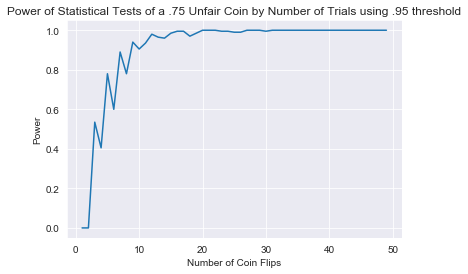

In [5]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .99 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .8
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

#### Multiple Comparisons
"correlation does not equal causation"
Correlation tells us that there seems to be some sort of mathematical relationship between the values of two different things. Sometimes, two things that seem to be correlated aren't actually correlated--it just happens to look that way due to the random nature of our dataset. Although the data may suggest that two things are correlated, we know that there is no actual relationship between them. We call these sorts of "false" correlations **Spurious Correlation**.

Spurious correlation is a Type 1 Error, meaning that it's a type of False Positive. We think we've found something important, when really there isn't. However, when we make Mulitple Comparisons by checking for many things at once, each of small risks of a Type 1 Error become cumulative! The main way we can avoid the cumulative effect of Type 1 errors is through the use of statistical corrections such as the **Bonferroni Correction**. To do this, we just divide our  α  value by the number of comparisons we are making to set a new, adjusted threshold rejecting the null hypothesis.

#### A/B Testing
1. Set H0 and Ha
2. Determine appropriate sample size to limit type I and type II errors to an acceptable level

With our current formulation of a hypothesis test, we can determine the necessary sample size for a desired $\alpha$ and $\beta$ combination. 

## $n=\frac{(z_\alpha+z_\beta)^2\sigma^2}{(\mu_1-\mu_0)^2}$


In [3]:
import scipy.stats as st

def compute_n(alpha, beta, mu_0, mu_1, var):
    z_alpha = st.norm.ppf(alpha)
    z_beta = st.norm.ppf(beta)
    num = ((z_alpha+z_beta)**2)*var
    den = (mu_1 - mu_0)**2
    return num/den

alpha = .01 #Part of A/B test design
beta = .01 #Part of A/B test design
mu_0 = .76 #Part of A/B test design
mu_1 = .8 #Part of A/B test design
var = .1 #sample variance

compute_n(alpha, beta, mu_0, mu_1, var)

1352.9736077635823

#### Goodhart's Law & Metric Tracking
Goodhart's Law: 
"Any observed statistical regularity will tend to collapse once pressure is placed upon it for control purposes." --Charles Goodhart

In plain English, this translates to:

"Any measure which becomes a target ceases to be an effective measure!"

Examples: cobra skin bounties, standardized testing 